
<div style="text-align: center;
            position: relative;
            overflow: hidden;
            border-radius: 8px;
            border: 3px solid black;
            background-image: url('https://sokodirectory.com/wp-content/uploads/2015/09/financial-services.png');
            color: white;">
    <h2 style="background-color: rgba(2, 0, 36, 0.6);color:white;text-transform: uppercase;padding:50px 0px;margin:0px">Auto Hall Stock Price Prediction (LSTM)</h2>
</div>


# I-DATA PREPARATION

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime, timedelta
import math


from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


/kaggle/input/auto-hall-stock-exchange-price/Auto-Haul.csv


In [32]:
pip install ta

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [34]:
from ta.trend import SMAIndicator
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [35]:
df = pd.read_csv('/kaggle/input/auto-hall-stock-exchange-price/Auto-Haul.csv')

df

,Date,Open,Close,High,Low,Number of shares traded,Volume,Nombre de contrats,Capitalization,Adjusted price
0,16/04/2024,82.00,81.50,83.00,81.05,138578.0,11340434.32,205.0,4.099004e+09,81.50
1,15/04/2024,71.00,78.00,78.09,70.00,75414.0,5638126.71,213.0,3.922973e+09,78.00
2,09/04/2024,66.90,71.00,72.00,66.00,43719.0,3024551.67,123.0,3.570911e+09,71.00
3,08/04/2024,66.70,66.52,66.90,66.35,63690.0,4234182.80,48.0,3.345592e+09,66.52
4,05/04/2024,65.95,66.60,66.79,65.95,7194.0,477809.84,41.0,3.349616e+09,66.60
...,...,...,...,...,...,...,...,...,...,...
745,23/04/2021,83.00,84.00,84.00,82.61,3300.0,277015.50,10.0,4.224740e+09,84.00
746,22/04/2021,84.50,84.50,84.50,84.50,21.0,1774.50,2.0,4.249888e+09,84.50
747,21/04/2021,83.95,84.78,84.78,83.95,93.0,7812.47,3.0,4.263970e+09,84.78
748,20/04/2021,83.99,82.41,83.99,82.41,103.0,8496.13,4.0,4.144772e+09,82.41


# II-BASIC INFORMATION

In [36]:
df.describe()

,Open,Close,High,Low,Number of shares traded,Volume,Nombre de contrats,Capitalization,Adjusted price
count,750.000000,750.000000,750.000000,750.000000,750.000000,7.500000e+02,732.000000,7.500000e+02,750.000000
mean,79.986013,82.091800,80.571280,79.038507,8786.866667,7.409143e+05,17.325137,4.128768e+09,82.091800
std,19.123349,13.764475,19.254408,18.962954,31987.857054,2.924214e+06,20.534000,6.922778e+08,13.764475
min,0.000000,63.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.168555e+09,63.000000
25%,69.992500,70.225000,70.350000,68.850000,130.000000,1.063488e+04,6.000000,3.531933e+09,70.225000
50%,78.355000,79.055000,79.075000,77.000000,1122.000000,9.137121e+04,11.500000,3.976034e+09,79.055000
75%,92.577500,92.575000,92.967500,91.500000,5842.000000,4.665702e+05,21.000000,4.656016e+09,92.575000
max,114.800000,114.000000,114.950000,112.900000,679920.000000,6.459272e+07,213.000000,5.733576e+09,114.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     750 non-null    object 
 1   Open                     750 non-null    float64
 2   Close                    750 non-null    float64
 3   High                     750 non-null    float64
 4   Low                      750 non-null    float64
 5   Number of shares traded  750 non-null    float64
 6   Volume                   750 non-null    float64
 7   Nombre de contrats       732 non-null    float64
 8   Capitalization           750 non-null    float64
 9   Adjusted price           750 non-null    float64
dtypes: float64(9), object(1)
memory usage: 58.7+ KB


In [38]:
df.shape

(750, 10)

In [39]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by='Date', ascending=True)
print(df.head())


          Date   Open  Close   High    Low  Number of shares traded  \
749 2021-04-19  82.40  82.40  82.40  82.40                     65.0   
748 2021-04-20  83.99  82.41  83.99  82.41                    103.0   
747 2021-04-21  83.95  84.78  84.78  83.95                     93.0   
746 2021-04-22  84.50  84.50  84.50  84.50                     21.0   
745 2021-04-23  83.00  84.00  84.00  82.61                   3300.0   

       Volume   Nombre de contrats  Capitalization  Adjusted price  
749    5356.00                 4.0    4.144269e+09           82.40  
748    8496.13                 4.0    4.144772e+09           82.41  
747    7812.47                 3.0    4.263970e+09           84.78  
746    1774.50                 2.0    4.249888e+09           84.50  
745  277015.50                10.0    4.224740e+09           84.00  


In [40]:
Col = ['Open', 'Close', 'High', 'Low', 'Number of shares traded', 'Nombre de contrats', 'Adjusted price']
data_zero = df[df[Col].eq(0).any(axis=1)]
print(data_zero)

          Date  Open   Close  High  Low  Number of shares traded  Volume   \
726 2021-05-24   0.0   89.10   0.0  0.0                      0.0      0.0   
701 2021-06-28   0.0   90.20   0.0  0.0                      0.0      0.0   
689 2021-07-14   0.0   86.90   0.0  0.0                      0.0      0.0   
668 2021-08-18   0.0   94.80   0.0  0.0                      0.0      0.0   
665 2021-08-24   0.0   94.98   0.0  0.0                      0.0      0.0   
662 2021-08-27   0.0   94.90   0.0  0.0                      0.0      0.0   
574 2022-01-03   0.0  103.00   0.0  0.0                      0.0      0.0   
555 2022-01-31   0.0  110.90   0.0  0.0                      0.0      0.0   
543 2022-02-16   0.0  111.00   0.0  0.0                      0.0      0.0   
533 2022-03-02   0.0  102.00   0.0  0.0                      0.0      0.0   
506 2022-04-08   0.0   91.10   0.0  0.0                      0.0      0.0   
476 2022-05-24   0.0   83.40   0.0  0.0                      0.0      0.0   

<div style="padding:10px;border:3px solid black;border-radius:8px;">
    In short, when Open, High, Low ,Number of shares traded Volume and Number of contracts are equal to zero for a given day, this generally indicates a lack of activity for that stock during that specific period. This can be due to a variety of factors, such as a lack of interest in the stock, market vacations or trading restrictions. But these days are not holidays, which means that investors are sometimes not interested in the stock.
</div>


In [41]:
df= df[df['Open'] != 0]

In [48]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = remove_outliers_iqr(df, ['Volume ', 'Nombre de contrats'])

print(df)



          Date   Open  Close   High    Low  Number of shares traded  \
749 2021-04-19  82.40  82.40  82.40  82.40                     65.0   
748 2021-04-20  83.99  82.41  83.99  82.41                    103.0   
747 2021-04-21  83.95  84.78  84.78  83.95                     93.0   
746 2021-04-22  84.50  84.50  84.50  84.50                     21.0   
745 2021-04-23  83.00  84.00  84.00  82.61                   3300.0   
..         ...    ...    ...    ...    ...                      ...   
11  2024-03-27  64.00  64.94  64.96  64.00                    945.0   
10  2024-03-28  64.50  64.91  64.91  64.00                    693.0   
7   2024-04-02  64.93  63.40  64.93  63.20                   2002.0   
6   2024-04-03  63.40  63.70  64.80  63.40                   2966.0   
5   2024-04-04  64.00  65.00  65.00  64.00                   4772.0   

       Volume   Nombre de contrats  Capitalization  Adjusted price   Returns  
749    5356.00                 4.0    4.144269e+09           82.40  

In [49]:
df = df.dropna()

# III-EXPLORATORY DATA ANALYSIS (EDA):

In [50]:
df['Returns'] = df['Close'].pct_change() * 100
print(df.head())

          Date   Open  Close   High    Low  Number of shares traded  \
748 2021-04-20  83.99  82.41  83.99  82.41                    103.0   
747 2021-04-21  83.95  84.78  84.78  83.95                     93.0   
746 2021-04-22  84.50  84.50  84.50  84.50                     21.0   
745 2021-04-23  83.00  84.00  84.00  82.61                   3300.0   
744 2021-04-26  84.80  84.80  84.80  84.80                      3.0   

       Volume   Nombre de contrats  Capitalization  Adjusted price   Returns  
748    8496.13                 4.0    4.144772e+09           82.41       NaN  
747    7812.47                 3.0    4.263970e+09           84.78  2.875865  
746    1774.50                 2.0    4.249888e+09           84.50 -0.330267  
745  277015.50                10.0    4.224740e+09           84.00 -0.591716  
744     254.40                 2.0    4.264976e+09           84.80  0.952381  


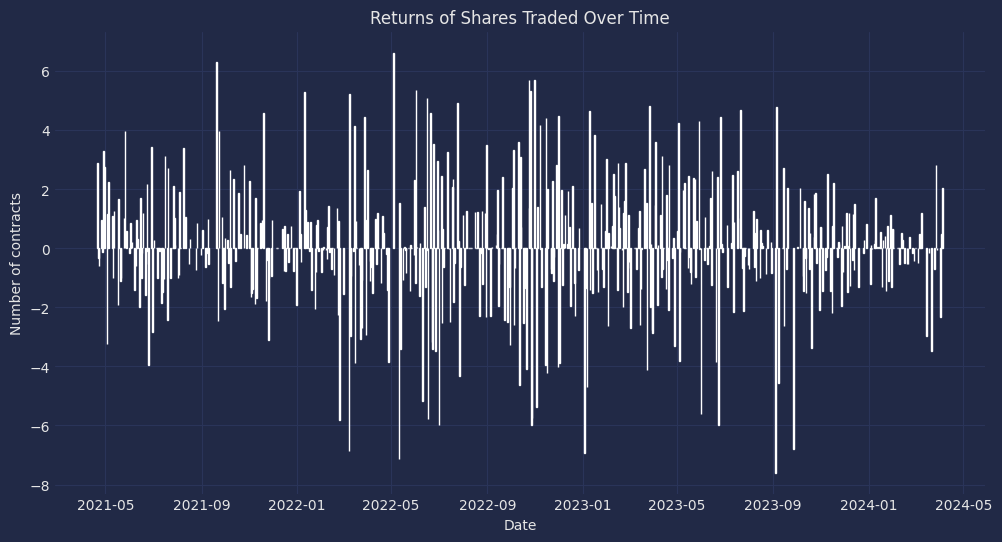

In [51]:
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Returns'])
plt.xlabel('Date')
plt.ylabel('Number of contracts')
plt.title('Returns of Shares Traded Over Time')
plt.show()

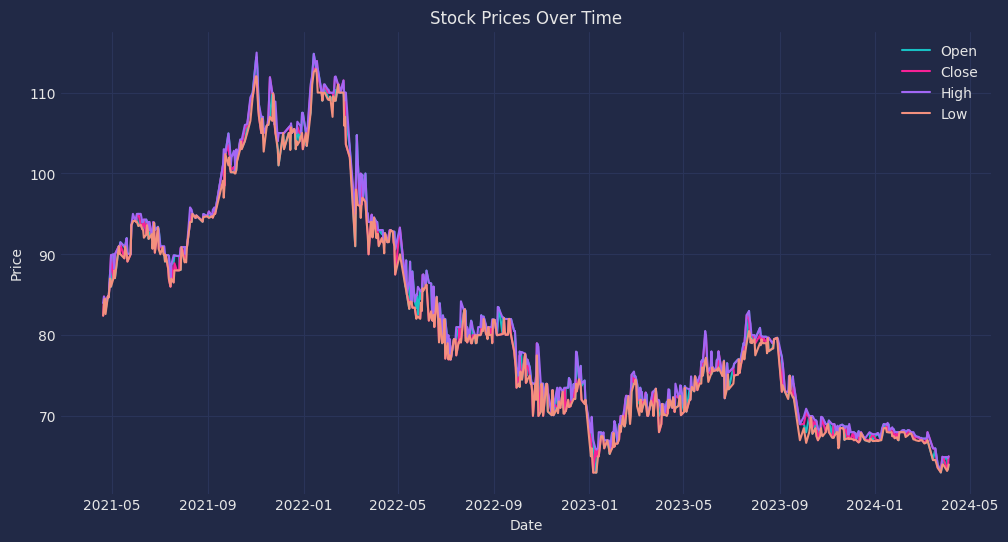

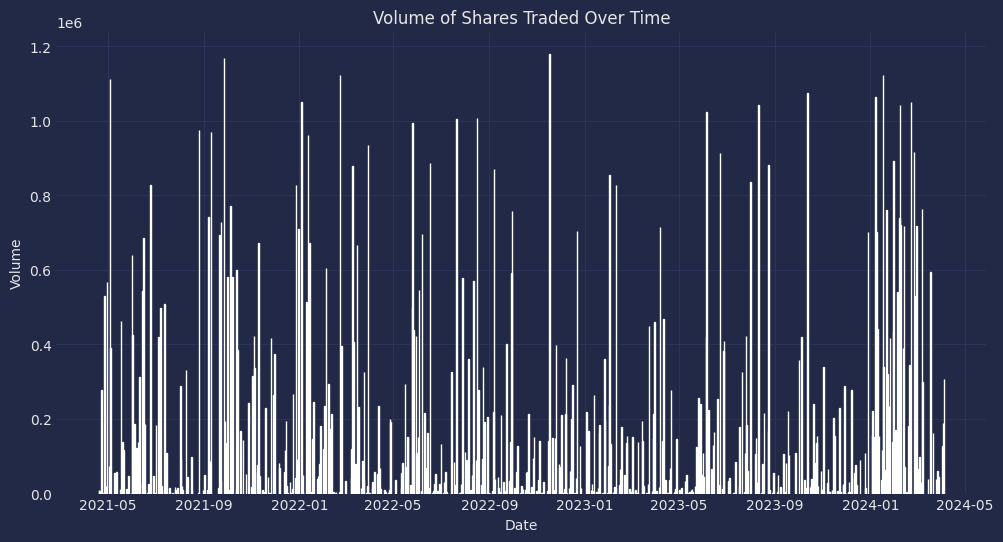

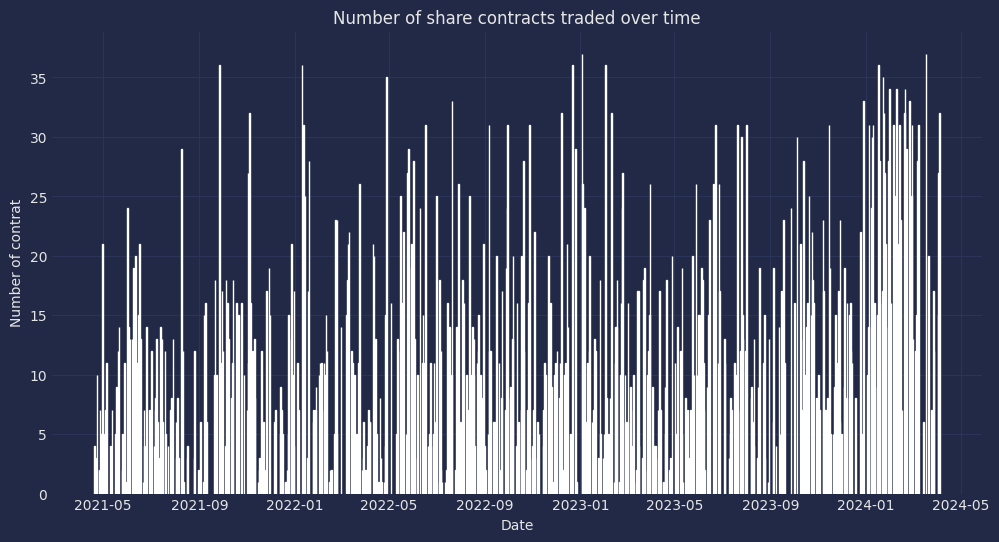

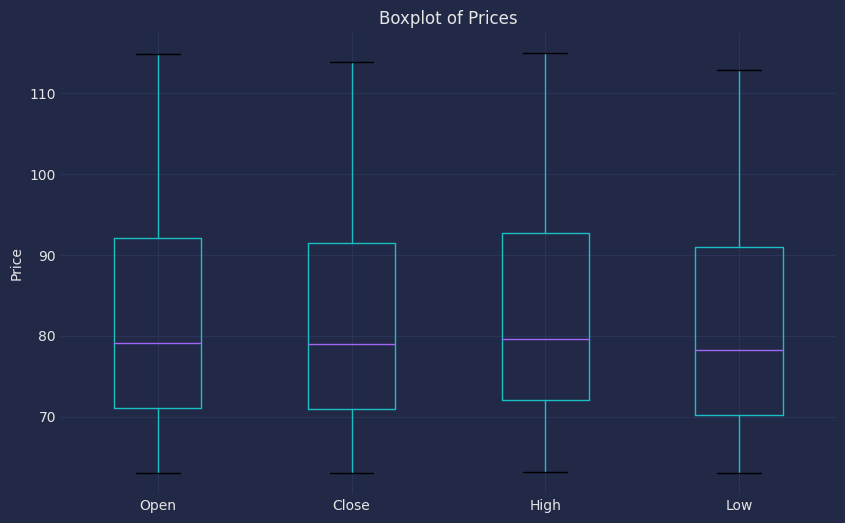

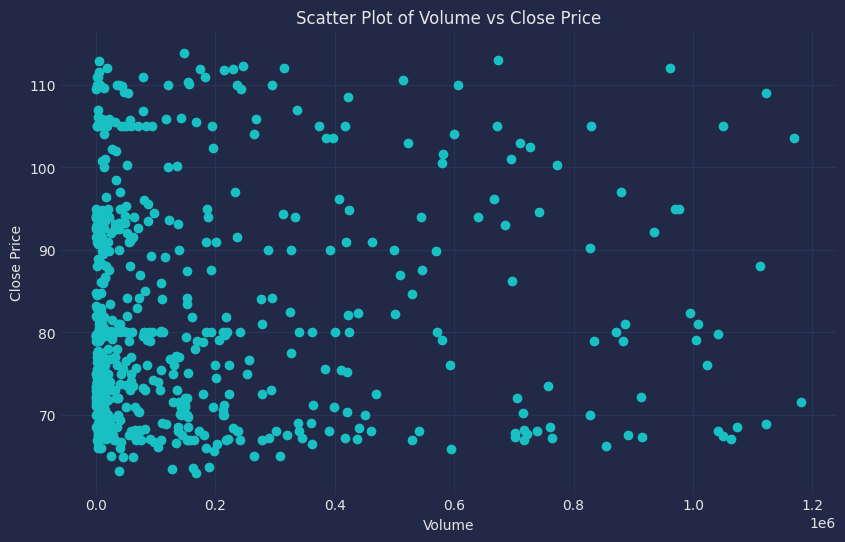

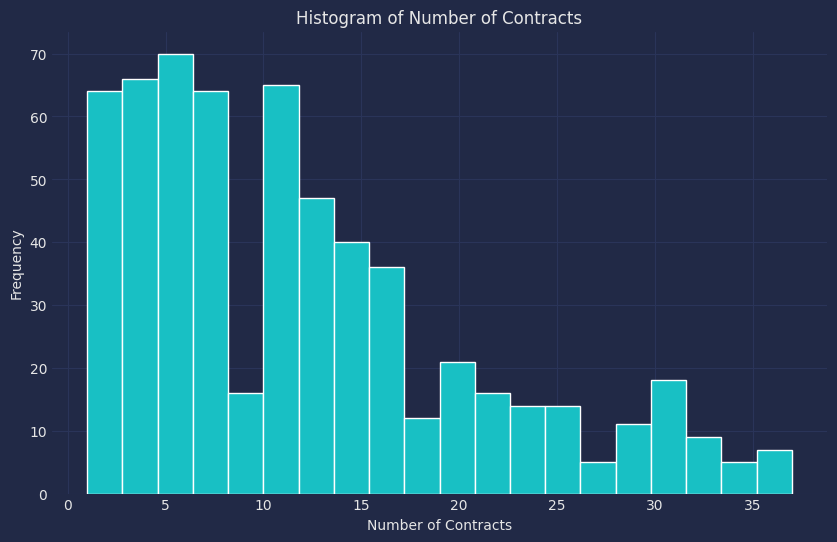

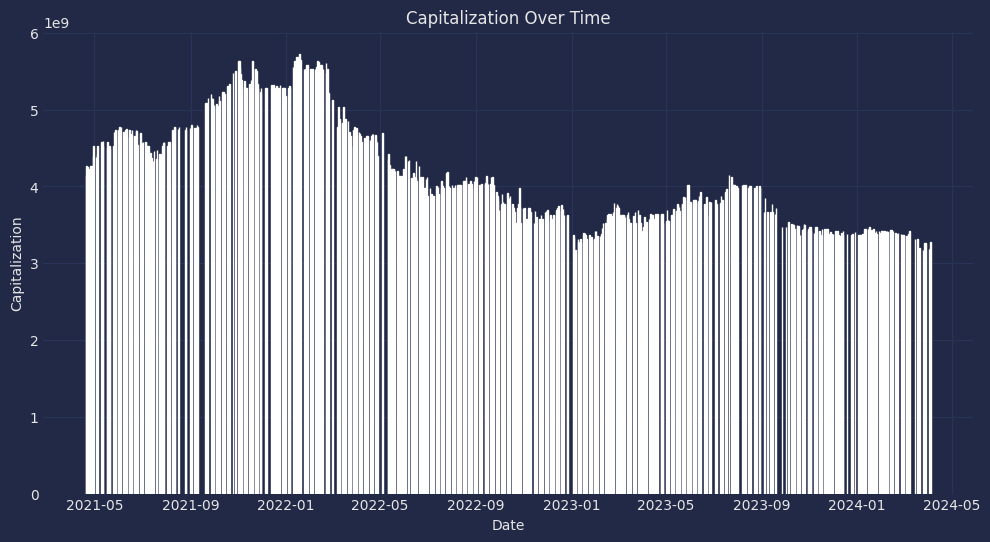

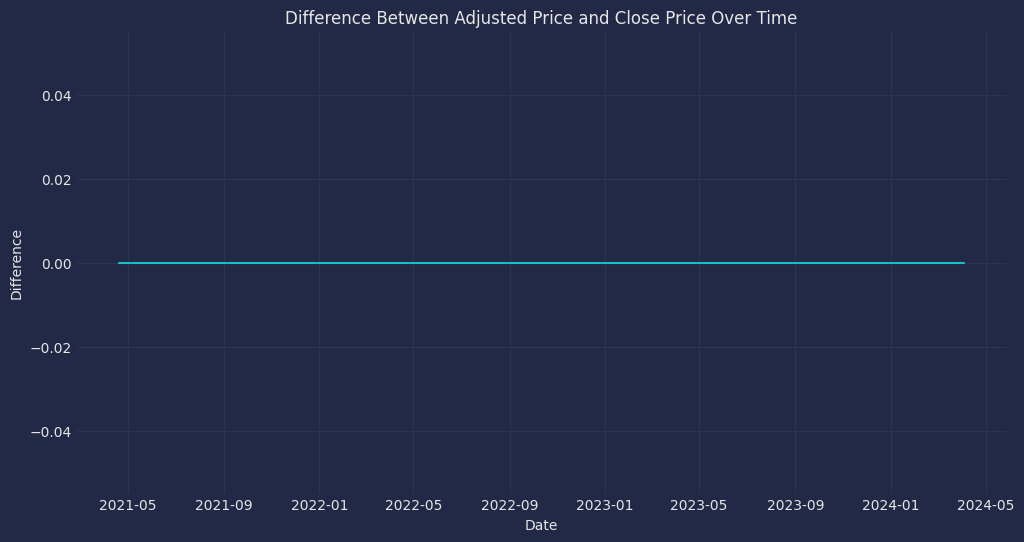

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open')
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume '])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume of Shares Traded Over Time')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Nombre de contrats'])
plt.xlabel('Date')
plt.ylabel('Number of contrat')
plt.title('Number of share contracts traded over time')
plt.show()

price_data = df[['Open', 'Close', 'High', 'Low']]
plt.figure(figsize=(10, 6))
price_data.boxplot()
plt.title('Boxplot of Prices')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(10,6))
plt.scatter(df['Volume '], df['Close'])
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Volume vs Close Price')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(df['Nombre de contrats'], bins=20)
plt.xlabel('Number of Contracts')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Contracts')
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Capitalization'])
plt.xlabel('Date')
plt.ylabel('Capitalization')
plt.title('Capitalization Over Time')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adjusted price'] - df['Close'])
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Difference Between Adjusted Price and Close Price Over Time')
plt.show()


# VI-USING TECHNICAL INDICATORS 

<div style="padding:10px;border:3px solid black;border-radius:8px;">
  Technical analyses provide a graphic visualization of a stock's key technical indicators, which can help traders and investors make informed decisions about buying or selling that stock. Here are a few points on the value of each technical analysis component:

**Simple Moving Average (SMA ):** The SMA smooths price data over a specific period (in this case, 20 days) to visualize the overall trend in the stock's price. It can be used to identify medium-term trends.

**Bollinger Bands (BB):** Bollinger Bands are used to assess a stock's volatility and overbought/oversold levels. When prices are close to the upper band, this may indicate that the stock is overbought, while prices close to the lower band may indicate an oversold situation.

**Relative Strength Index (RSI ):** The RSI measures the strength and speed of a stock's price movements. A high RSI may indicate that the stock is overbought and that a downward correction could occur, while a low RSI may indicate an oversold situation and the possibility of a price rebound.

By combining these indicators on a single chart, traders can gain an overview of the different forces influencing the share price. This can help them make more informed decisions and identify potential opportunities in the market.
</div>

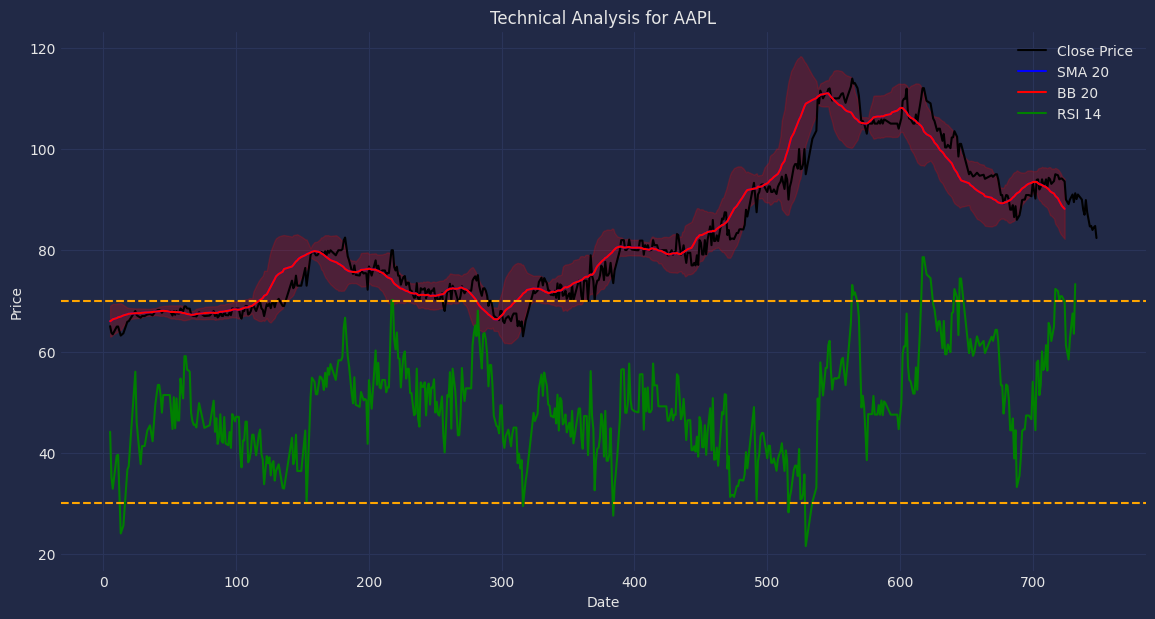

In [58]:
ticker = "AAPL"  

sma_20 = SMAIndicator(df['Close'], window=20)
bb = BollingerBands(df['Close'], window=20, window_dev=2)
rsi = RSIIndicator(df['Close'], window=14)

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(sma_20.sma_indicator(), label='SMA 20', color='blue')

# BB
plt.plot(bb.bollinger_mavg(), label='BB 20', color='red')
plt.fill_between(df.index, bb.bollinger_hband(), bb.bollinger_lband(), alpha=0.2, color='red')

# RSI
plt.plot(rsi.rsi(), label='RSI 14', color='green')
plt.axhline(70, linestyle='--', color='orange')
plt.axhline(30, linestyle='--', color='orange')


plt.title(f"Technical Analysis for {ticker}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


<div style="padding:10px;border:3px solid black;border-radius:8px;">
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title> </title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
        }
        h2 {
            color: #333;
        }
        p {
            margin-bottom: 10px;
        }
        .info-box {
            background-color: #f9f9f9;
            border-left: 6px solid #007bff;
            padding: 10px;
            margin-bottom: 20px;
        }
        .info-box p {
            margin-bottom: 5px;
        }
    </style>
</head>
<body>
    <h2>Interpreting Bollinger Bands and RSI Results</h2>
    <div class="info-box">
        <h3 style="color: blue;">Bollinger Bands (BB)</h3>
        <p><strong>Price above upper band (upper BB 20 line):</strong> This may indicate that the market is overbought, suggesting a potential reversal to the downside or a period of consolidation.</p>
        <p><strong>Price below lower band (lower BB 20 line):</strong> This may indicate that the market is oversold, suggesting a potential upward turnaround or a period of consolidation.</p>
        <p><strong>Price between the two bands:</strong> This may indicate a period of price stability or consolidation, with no strong upward or downward trend.</p>
    </div>
    <div class="info-box">
        <h3 style="color: blue;">Relative Strength Index (RSI) 14</h3>
        <p><strong>RSI above 70:</strong> This generally indicates that the market is overbought, meaning that the price has risen significantly over the period analyzed.</p>
        <p><strong>RSI below 30:</strong> This generally indicates that the market is oversold, meaning that the price has fallen significantly over the analysis period.</p>
        <p><strong>RSI between 30 and 70:</strong> This generally indicates a period of price stability or consolidation, with no strong upward or downward trend.</p>
    </div>
    <div class="info-box">
        <h3 style="color: blue;">Combined Interpretation</h3>
        <p>When RSI 14 is above 70 and the price is above the upper BB 20 band, this may indicate strong overbought market conditions, increasing the likelihood of a downward correction.</p>
        <p>When RSI 14 is below 30 and the price is below the lower BB 20 band, this may indicate a strong oversold market, increasing the probability of an upward correction.</p>
    </div>
</body>
</html>
</div>

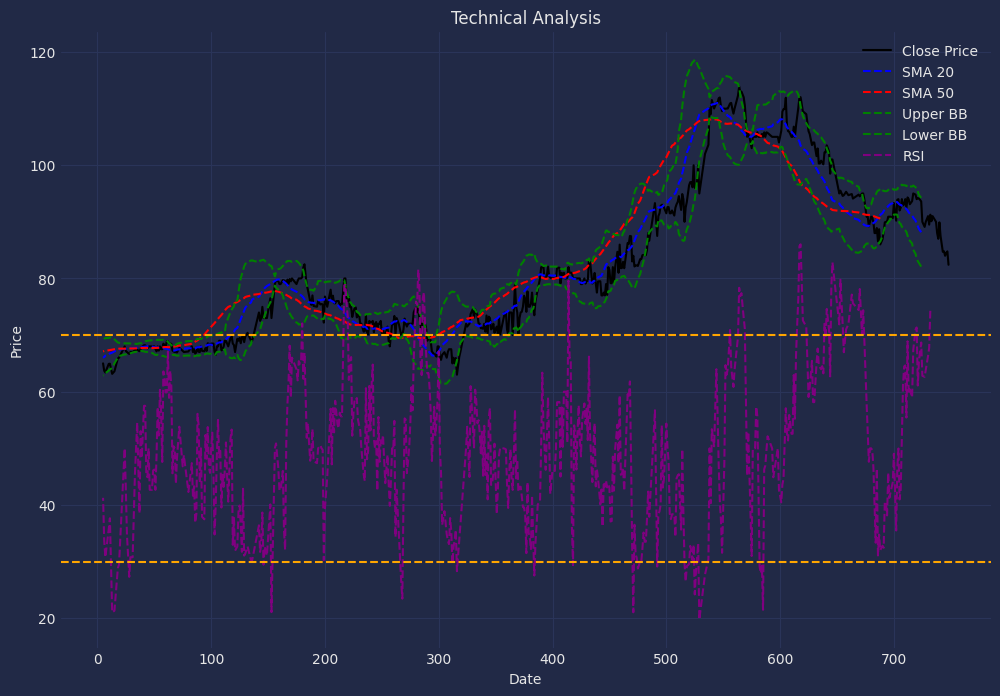

In [59]:
# (SMA)
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

# BB
def calculate_bb(data, window, num_std):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, rolling_mean, lower_band

#  RSI
def calculate_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

sma_20 = calculate_sma(df['Close'], window=20)
sma_50 = calculate_sma(df['Close'], window=50)


upper_bb, middle_bb, lower_bb = calculate_bb(df['Close'], window=20, num_std=2)


rsi = calculate_rsi(df['Close'], window=14)


plt.figure(figsize=(12, 8))

plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(sma_20, label='SMA 20', linestyle='--', color='blue')
plt.plot(sma_50, label='SMA 50', linestyle='--', color='red')


plt.plot(upper_bb, label='Upper BB', linestyle='--', color='green')
plt.plot(lower_bb, label='Lower BB', linestyle='--', color='green')


plt.plot(rsi, label='RSI', linestyle='--', color='purple')
plt.axhline(70, linestyle='--', color='orange')
plt.axhline(30, linestyle='--', color='orange')


plt.title("Technical Analysis")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()



<div style="padding:10px;border:3px solid black;border-radius:8px;">
 By combining these functions to calculate SMA, Bollinger Bands and RSI, the code allows these technical indicators to be graphically visualized on a single chart, enabling traders and investors to interpret price movements and make informed decisions accordingly.
</div>


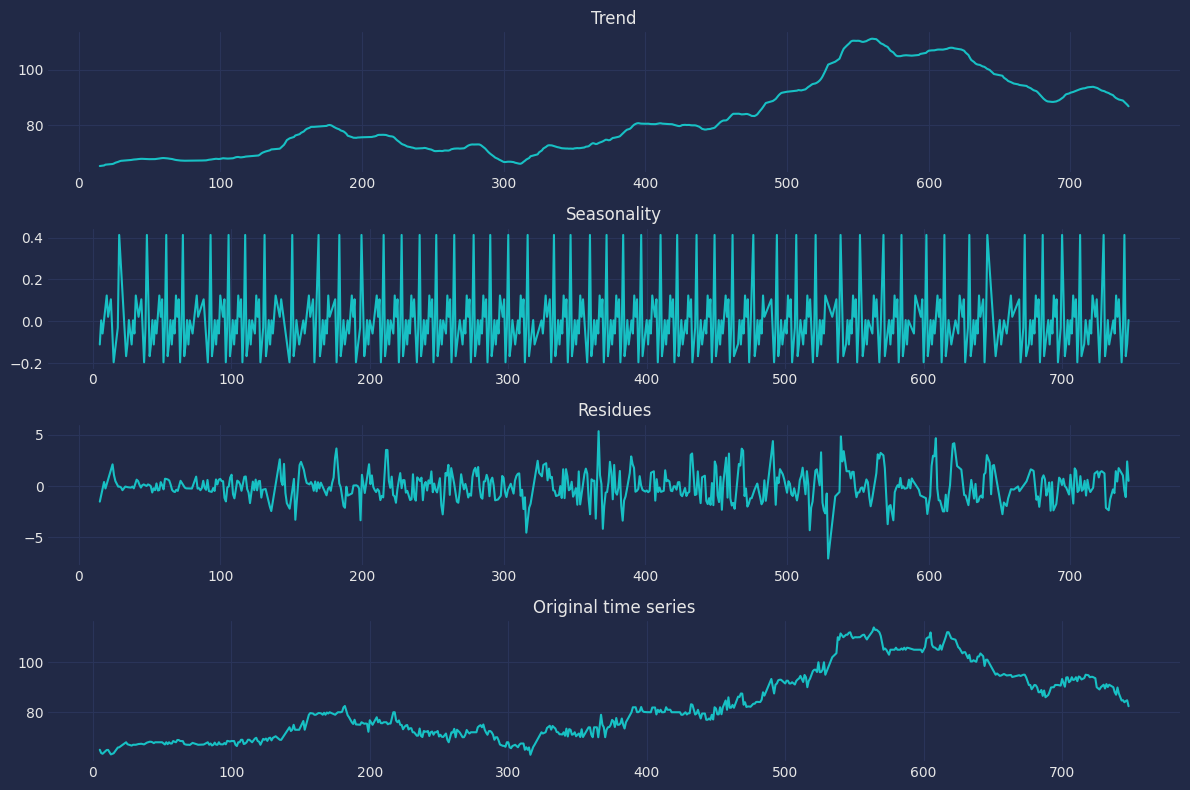

In [60]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=12)  # période saisonnière supposée

tendance = decomposition.trend
saisonnalite = decomposition.seasonal
residus = decomposition.resid


plt.figure(figsize=(12, 8))

# Trend
plt.subplot(411)
plt.plot(tendance, label='Trend')
plt.title('Trend')

# Seasonality
plt.subplot(412)
plt.plot(saisonnalite, label='Seasonality')
plt.title('Seasonality')

# Residues
plt.subplot(413)
plt.plot(residus, label='Residues')
plt.title('Residues')

# Original time series
plt.subplot(414)
plt.plot(df['Close'], label='Original time series')
plt.title('Original time series')

plt.tight_layout()
plt.show()


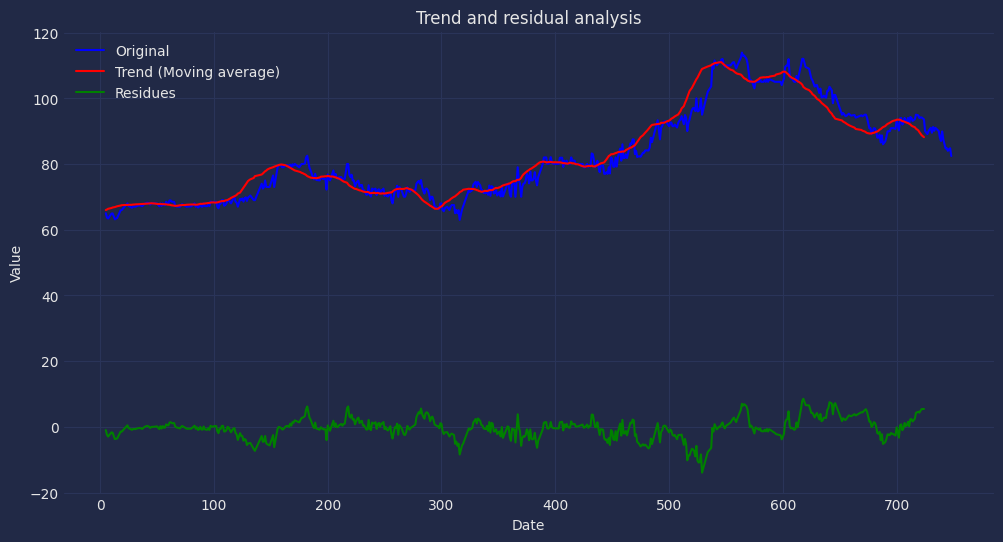

ADF test statistics : -5.230264028101689
p-value : 7.623732625649398e-06
Critical value : {'1%': -3.441694608475642, '5%': -2.866544718556839, '10%': -2.5694353738653684}
Test results : Stationary


In [61]:
rolling_mean = df['Close'].rolling(window=20).mean()

residuals = df['Close'] - rolling_mean


plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original', color='blue')
plt.plot(rolling_mean, label='Trend (Moving average)', color='red')
plt.plot(residuals, label='Residues', color='green')
plt.legend()
plt.title('Trend and residual analysis')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


result = adfuller(residuals.dropna())
print('ADF test statistics :', result[0])
print('p-value :', result[1])
print('Critical value :', result[4])
print('Test results :', 'Stationary' if result[1] < 0.05 else 'Non-stationary')


<div style="padding:10px;border:3px solid black;border-radius:8px;">

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title ></title>
<style>
  body {
    font-family: Arial, sans-serif;
    line-height: 1.6;
    margin: 20px;
  }
  h2 {
    color: #333;
  }
  p {
    margin-bottom: 15px;
  }
</style>
</head>
<body>
  <h2>Interpretation of ADF Test Results</h2>
  <p><strong>ADF test statistic:</strong> The value of the ADF test statistic is -5.23. The further the absolute value of this statistic is from zero, the more likely it is that the time series is stationary. In this case, a negative value indicates that the time series has been stationary.</p>
  <p><strong>p-value:</strong> The p-value is 7.62e-06, which is very low. In general, if the p-value is below a specified significance level (e.g. 0.05), we reject the null hypothesis that the time series is not stationary. Here, the p-value is well below 0.05, strongly suggesting that the time series is stationary.</p>
  <p><strong>Critical values:</strong> Critical values provide test thresholds for different meanings (1%, 5%, and 10%). If the ADF test statistic is below these critical values, we reject the null hypothesis (the series is not stationary).</p>
  <p><strong>Test result:</strong> The test result indicates that the time series is stationary. This means that the series appears to have no specific temporal trend or structure.</p>
  <p>In summary, the results of the augmented Dickey-Fuller test suggest that the time series is stationary, which is a desirable condition for many time series analyses and modeling.</p>
</body>
</html>
</div>

In [62]:
mu = df['Returns'].mean()
sigma = df['Returns'].std()

confidence_level = 0.95

z_score = np.abs(norm.ppf(1 - confidence_level))
VaR = -mu + z_score * sigma
print("Value at Risk (VaR) at 95% confidence level :", VaR)


Value at Risk (VaR) at 95% confidence level : 3.393330139629561



<div style="padding:10px;border:3px solid black;border-radius:8px;">
   The Value at Risk (VaR) at a 95% confidence level is 3.39 for your asset. This means that there is a 95% chance that daily losses on your asset will not exceed this amount.
</div>

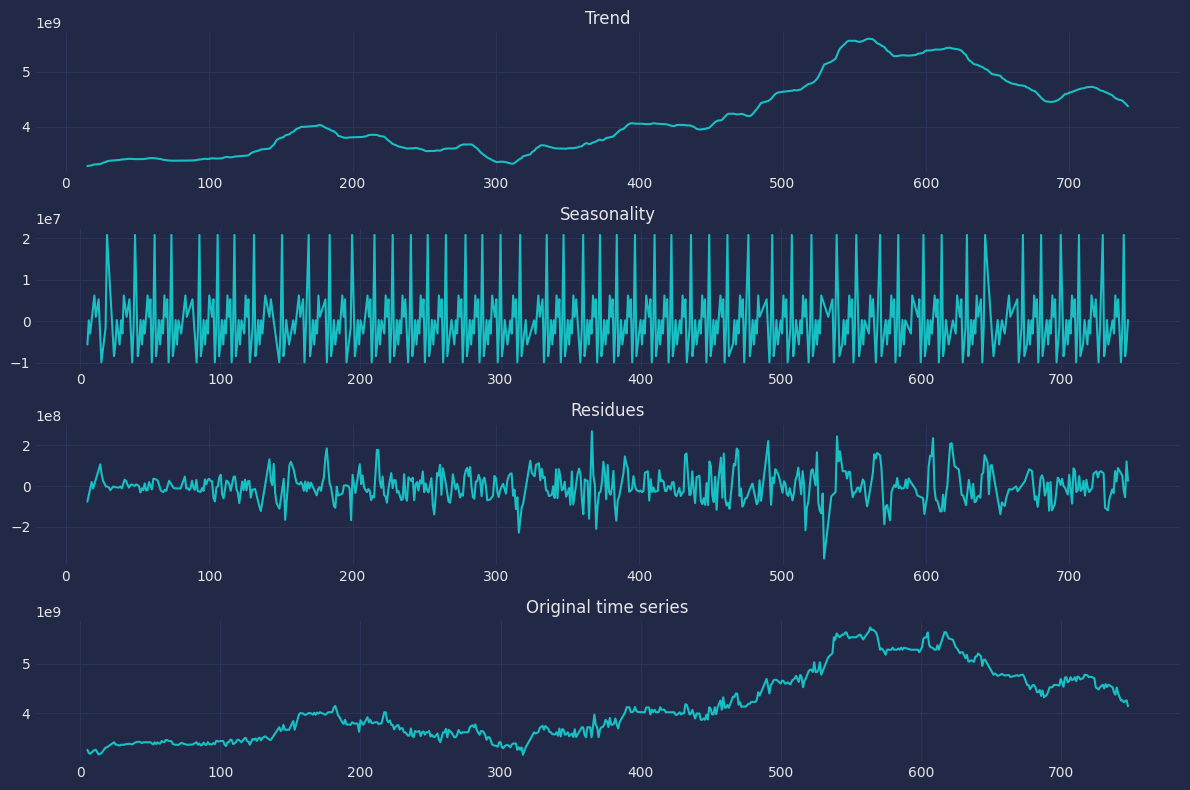

In [63]:

decomposition = seasonal_decompose(df['Capitalization'], model='additive', period=12) 


tendance = decomposition.trend
saisonnalite = decomposition.seasonal
residus = decomposition.resid


plt.figure(figsize=(12, 8))

# Trend
plt.subplot(411)
plt.plot(tendance, label='Trend')
plt.title('Trend')

# Seasonality
plt.subplot(412)
plt.plot(saisonnalite, label='Seasonality')
plt.title('Seasonality')

# Residues
plt.subplot(413)
plt.plot(residus, label='Residues')
plt.title('Residues')

# Original time series
plt.subplot(414)
plt.plot(df['Capitalization'], label='Original time series')
plt.title('Original time series')

plt.tight_layout()
plt.show()


Correlation matrix :
                             Date      Open     Close      High       Low  \
Date                     1.000000 -0.810404 -0.803910 -0.811408 -0.807500   
Open                    -0.810404  1.000000  0.994100  0.997739  0.996279   
Close                   -0.803910  0.994100  1.000000  0.995754  0.997671   
High                    -0.811408  0.997739  0.995754  1.000000  0.995300   
Low                     -0.807500  0.996279  0.997671  0.995300  1.000000   
Number of shares traded  0.113133 -0.058345 -0.064336 -0.051250 -0.065749   
Volume                   0.008020  0.059694  0.052252  0.066776  0.050545   
Nombre de contrats       0.263112 -0.162965 -0.176165 -0.146251 -0.186856   
Capitalization          -0.803910  0.994100  1.000000  0.995754  0.997671   
Adjusted price          -0.803910  0.994100  1.000000  0.995754  0.997671   
Returns                 -0.030690  0.020557  0.073488  0.031531  0.050034   

                         Number of shares traded   Vol

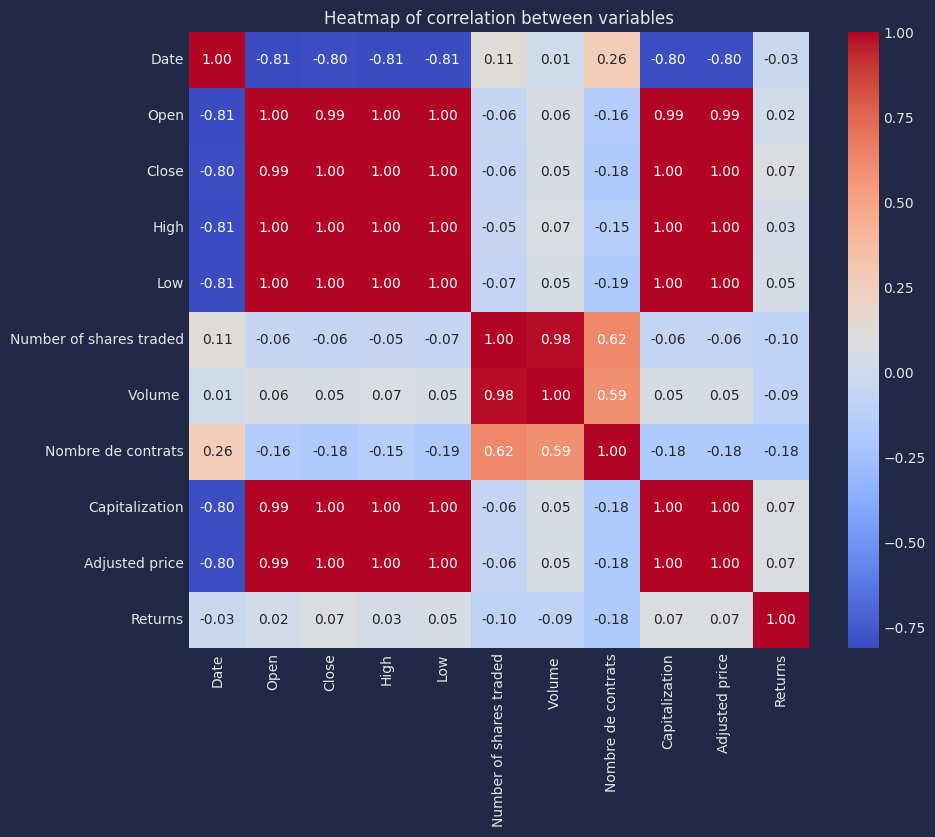

In [64]:
correlation_matrix = df.corr()

print("Correlation matrix :")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of correlation between variables")
plt.show()


# V-Modeling and forecasting

Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.1396 - val_loss: 0.0055
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0221 - val_loss: 0.0099
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0112 - val_loss: 0.0025
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0075 - val_loss: 0.0024
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0085 - val_loss: 0.0033
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0075 - val_loss: 0.0034
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0079 - val_loss: 0.0028
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0076 - val_loss: 0.0022
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0079 - val_loss: 0.0022
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0075 - val_loss: 0.0028
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0064 - val_loss: 0.0016
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0

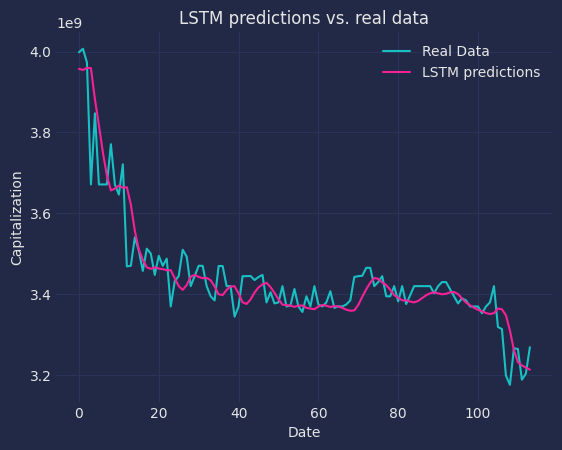

In [65]:
df_1 = df[['Date', 'Capitalization']].copy()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_1[['Capitalization']])


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


seq_length = 30


X, y = create_sequences(scaled_data, seq_length)


train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)


predictions = model.predict(X_test)


predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)


plt.plot(y_test, label='Real Data')
plt.plot(predictions, label='LSTM predictions')
plt.title('LSTM predictions vs. real data')
plt.xlabel('Date')
plt.ylabel('Capitalization')
plt.legend()
plt.show()

Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.1463 - val_loss: 0.0062
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0249 - val_loss: 0.0241
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0147 - val_loss: 0.0055
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0084 - val_loss: 0.0017
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0082 - val_loss: 0.0021
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0066 - val_loss: 0.0021
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0071 - val_loss: 0.0018
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0078 - val_loss: 0.0016
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115 - val_loss: 0.0011
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0098 - val_loss: 0.0017
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0069 - val_loss: 0.0019
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0

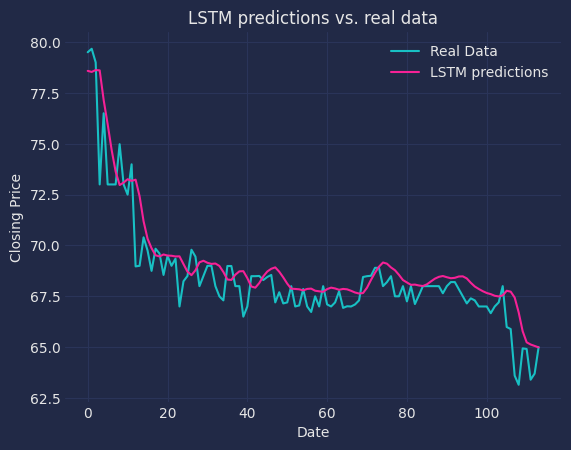

In [66]:

df_1 = df[['Date', 'Close']].copy()


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_1[['Close']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)
 
seq_length = 30

 
X, y = create_sequences(scaled_data, seq_length)
 
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
 
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)

predictions = model.predict(X_test)


predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

plt.plot(y_test, label='Real Data')
plt.plot(predictions, label='LSTM predictions')
plt.title('LSTM predictions vs. real data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [67]:
last_date = df_1['Date'].iloc[-1]
next_dates = pd.date_range(start=last_date, periods=31)[1:]  
 


# Create a time sequence from test data for the next 30 days
last_sequence = X_test[-1]  
next_predictions = []

for i in range(30):
    next_prediction = model.predict(last_sequence.reshape(1, seq_length, 1))
    next_predictions.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction[0, 0])


next_predictions = scaler.inverse_transform(np.array(next_predictions).reshape(-1, 1))
    
predictions_df = pd.DataFrame({'Date': next_dates, 'Predictions': next_predictions.flatten()})

print(predictions_df)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━